In [6]:
from amuse.lab import *
import matplotlib.pyplot as plt
import numpy as np
import csv
import ast
import sys


def e_vs_time(case,t_end,n):
    filename = "t_end={}_n={}_{}/ae.csv".format(t_end, n, case)

    t_step = 1577846.299687 | units.s

    # The csv file is otherwise too big to use
    csv.field_size_limit(sys.maxsize)

    a = dict()
    e = dict()
    with open(filename) as csvfile:
        ae = csv.reader(csvfile)

        for row in ae:
            # The ast.literal_eval makes from a string list a list with floats
            a[row[0]] = ast.literal_eval(row[1])
            e[row[0]] = ast.literal_eval(row[2])

    au = 1.5e11 # m


    ## generate the evolution time array.
    time_list = []
    time = np.arange(0, t_end, t_step.value_in(units.yr))
    

    for i in range (n):
        time_list.append(i*t_end+time)
    time_list = np.concatenate((time_list),axis=0)
    time_escape = time_list[np.where(np.array(e['earth'])>=1)[0]][3]

    plt.figure(figsize=(12, 10))
    plt.scatter(time_list, e["earth"])
    plt.axvline(x=time_escape,label='Escaping Time = %s yr'%(time_escape),color='red')
    plt.xlabel("Gravity Hydro Evovling Time [yr]",fontsize = 20)
    plt.xticks(fontsize=20)
    plt.ylabel("Eccentricity",fontsize = 20)
    plt.yticks(fontsize=20)
    plt.title(r'Eccentricity against gravity hydro evovling time for $t_{end}$ = %s yr, n = %s, %s'% (t_end,n, case),fontsize=18)
    plt.tight_layout()
    plt.legend(loc='lower right',fontsize = 25)
    plt.savefig("eccentricity_vs_time/at_t_end={}yr_n={}_{}.png".format(t_end, n, case))
    plt.show()

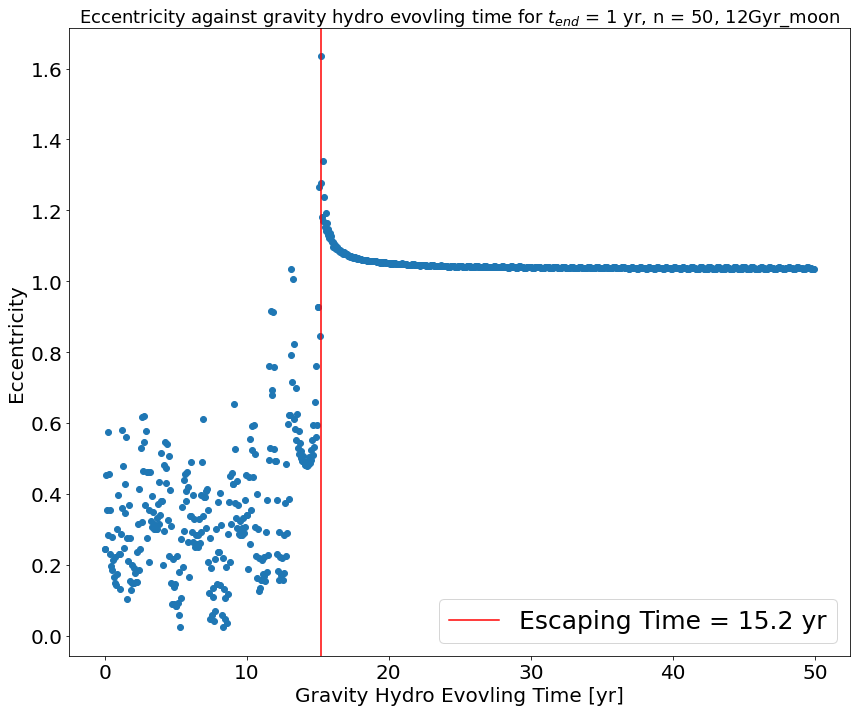

In [7]:
e_vs_time('12Gyr_moon',1,50)

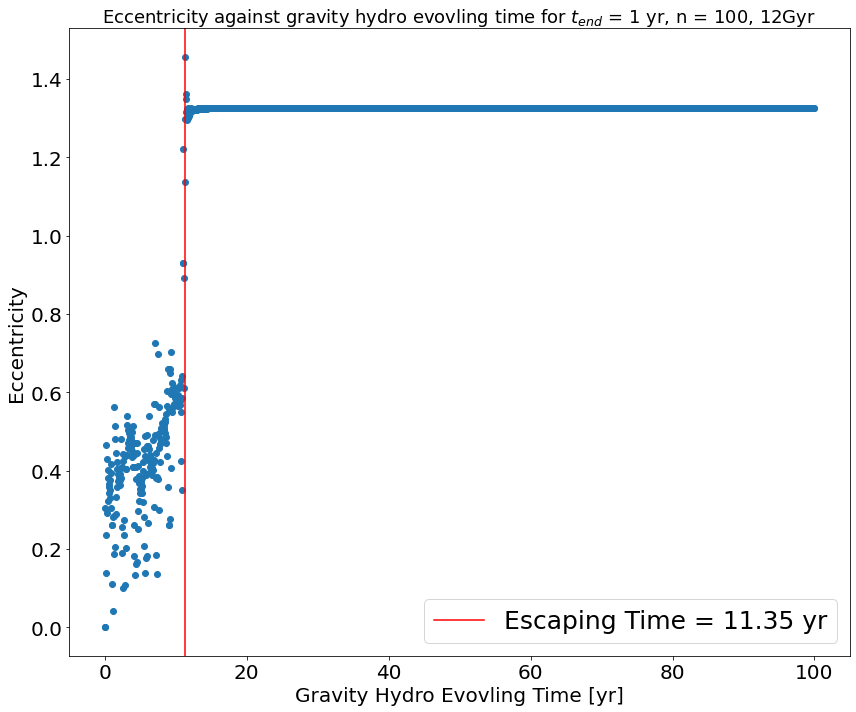

In [8]:
e_vs_time('12Gyr',1,100)

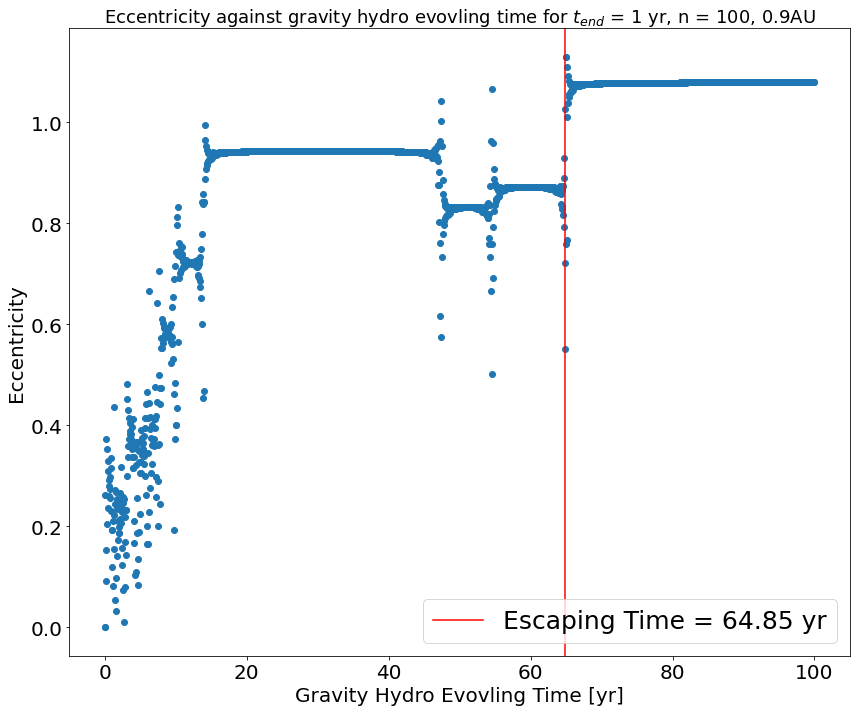

In [9]:
e_vs_time('0.9AU',1,100)

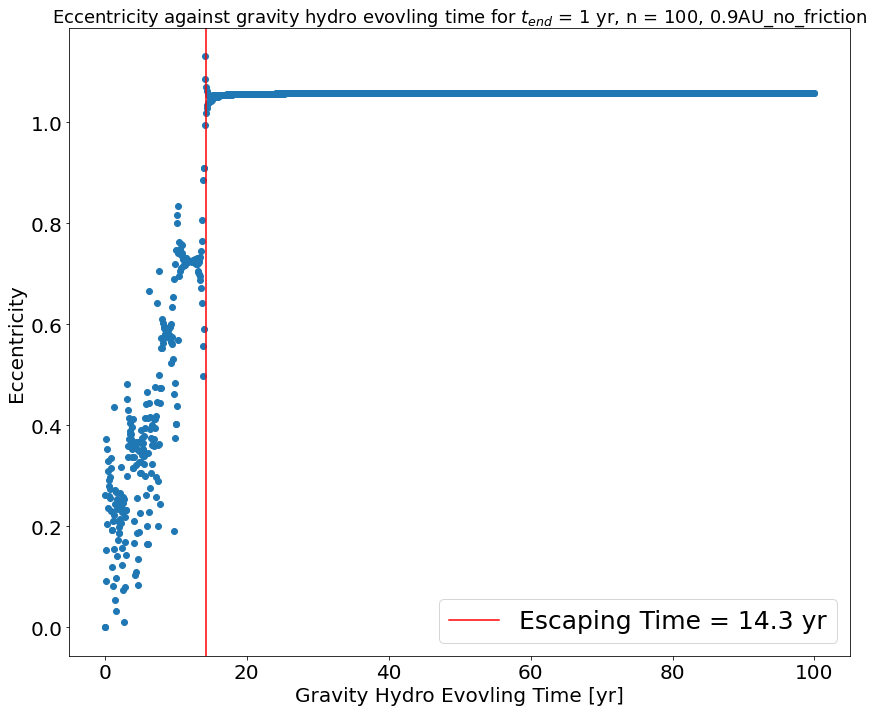

In [10]:
e_vs_time('0.9AU_no_friction',1,100)

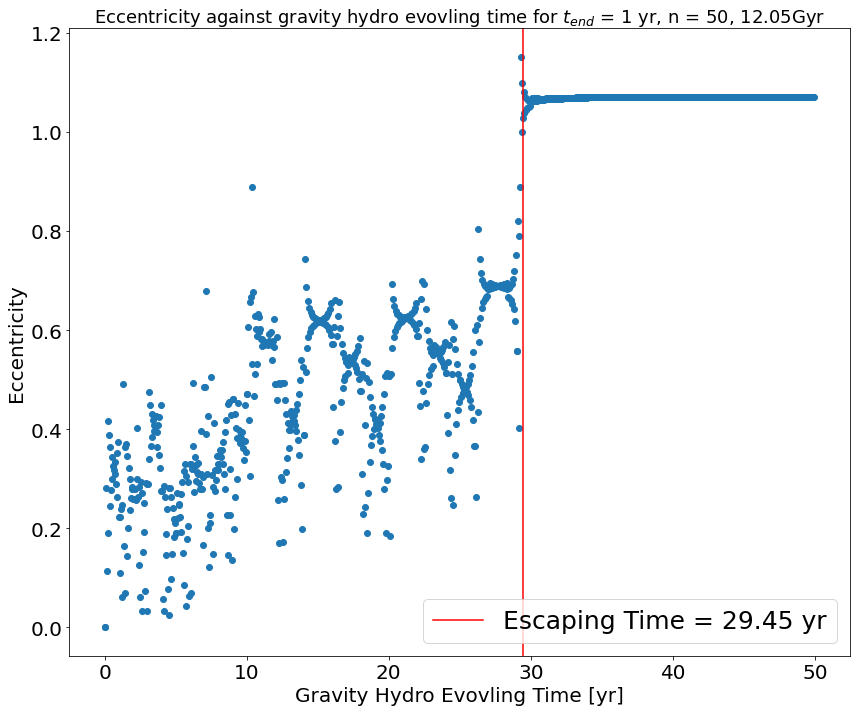

In [11]:
e_vs_time('12.05Gyr',1,50)